# WeRateDogs数据整理

## 收集

In [61]:
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 下载推特图像的预测数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [62]:
# 加载数据
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
# 加载tweet补充json文件数据
df_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        line_json = json.loads(line)
        df_list.append({'tweet_id': line_json['id'],
                        'retweet_count': int(line_json['retweet_count']),
                        'favorite_count': int(line_json['favorite_count'])})
tweet_supply = pd.DataFrame(df_list,columns=['tweet_id', 'retweet_count', 'favorite_count'])

## 评估
下列单元格描述了WeRateDogs数据集中每个表格的各列情况。为了观察表格与对应的描述，通过显示收集的 pandas DataFrame，显示整个表格。这个任务属于 pandas 视觉评估的机械性部分。

In [10]:
# Display the twitter_archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`twitter_archive`各列包括：
- **推特ID**：每条推特消息的唯一ID
- **答复状态ID**:答复状态ID
- **答复用户ID**:答复用户ID
- **时间戳**:消息发布时间
- **消息来源**:消息发布平台来源
- **消息内容**:发布消息的内容
- **转发状态ID**:转发状态ID
- **转发用户ID**:转发用户ID
- **转发状态时间戳**:转发状态时间戳
- **扩展链接**:包括狗的照片链接
- **评级分子**:评级分子
- **评级分母**:评级分母
- **名字**:狗的名字
- **doggo**:狗的地位。目测提取的数据极少，可能派不上用处。
- **pupper**:
- **puppo**:
- **floofer**:


In [3]:
# Display the image_predictions table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


通过一个可以对狗狗种类进行分类的[神经网络](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)，运行这份推特档案中的所有图像。获取的结果：一份图像预测结果表格，其中包含了预测结果的前三名，推特 ID，图像 url 以及最可信的预测结果对应的图像编号（由于推特最多包含 4 个图片，所以编号为 1 到 4）。

`image_predictions`各列包括：
- **推特ID**：对应的推特消息ID。是推特链接的最后一部分，位于 "status/" 后面 → https://twitter.com/dog_rates/status/889531135344209921
- **图片链接**：是预测的图像资源链接
- **图像编号**：最可信的预测结果对应的图像编号 → 1 推特中的第一张图片
- **一号预测**：是算法对推特中图片的一号预测 → 金毛犬
- **一号预测的可信度**：是算法的一号预测的可信度 → 95%
- **一号预测该图片是否属于“狗”**：是一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等） → True 真
- **二号预测**：同上
- **二号预测可信度**：
- **二号预测图片是否属于“狗”**：
- **三号预测**：
- **三号预测可信度**：
- **三号预测图片是否属于“狗”**：


In [19]:
# Display the tweet_supply table
tweet_supply

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


通过推特 API 获取附加数据。
`tweet_supply`各列包括：
- **推特ID**：对应推特消息的ID
- **转发数量**：转发本条消息的数量
- **喜欢数量**：喜欢本条消息的数量

In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [48]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,None,None,None,None
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,None,None,pupper,None
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None
1770,678341075375947776,NaN,NaN,2015-12-19 22:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper likes tape. 12/10 https://t.co/cSp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678341075...,12,10,None,None,None,pupper,None
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199...,11,10,None,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,10,None,None,None,None,None


In [6]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [6]:
twitter_archive.timestamp.sort_values(ascending=False)

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [60]:
# excel 中显示rating_numerator和rating_denominator混入了前边text列的内容，通过以下两条语句证明是excel读取csv文件问题,数据正确
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [59]:
sum(twitter_archive.rating_numerator.value_counts().get_values())

2356

In [49]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [7]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Toby           7
Daisy          7
Buddy          7
Bailey         7
Scout          6
Milo           6
Jack           6
Stanley        6
Oscar          6
Koda           6
Bella          6
Dave           6
Jax            6
Rusty          6
Leo            6
George         5
            ... 
Moofasa        1
Iggy           1
Koko           1
Schnitzel      1
Chevy          1
Remus          1
Noah           1
Cannon         1
Dot            1
Torque         1
Iroh           1
Ed             1
Rizzo          1
Jersey         1
Tripp          1
Brudge         1
Billl          1
Deacon         1
Brockly        1
Pinot          1
light          1
Major          1
Jazz           1
Lugan          1
Pavlov         1
Bobb           1
Arnold         1
Peanut        

In [8]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [9]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [10]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [11]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [4]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
pd.set_option('precision', 10)
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.0750000000e+03,2075.0000000000,2075.0000000000,2075.0000000000,2075.0000000000
mean,7.3845135785e+17,1.2038554217,0.5945482636,0.1345886095,0.0603241686
std,6.7852033330e+16,0.5618750280,0.2711735169,0.1006657394,0.0509059313
min,6.6602088802e+17,1.0000000000,0.0443334000,0.0000000101,0.0000000002
25%,6.7648350714e+17,1.0000000000,0.3644120000,0.0538862500,0.0162224000
50%,7.1199880986e+17,1.0000000000,0.5882300000,0.1181810000,0.0494438000
75%,7.9320344853e+17,1.0000000000,0.8438550000,0.1955655000,0.0918075500
max,8.9242064356e+17,4.0000000000,1.0000000000,0.4880140000,0.2734190000


In [20]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1056,714606013974974464,https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg,1,Norfolk_terrier,0.293007,True,Labrador_retriever,0.25619800,True,golden_retriever,0.1296430000,True
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,1,Labrador_retriever,0.495047,True,Chesapeake_Bay_retriever,0.35018800,True,golden_retriever,0.1424000000,True
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.00022809,False,llama,0.0000671787,False
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.34173000,True,German_short-haired_pointer,0.1777020000,True
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.38507500,True,Eskimo_dog,0.1634850000,True


In [12]:
# 没有正确识别为狗的数量
len(image_predictions[~(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

324

In [17]:
# 正确识别为狗的数量
len(image_predictions[(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

1751

In [27]:
tweet_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [7]:
tweet_supply.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [25]:
tweet_supply[tweet_supply.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [26]:
tweet_supply.retweet_count.value_counts()

1280     5
312      5
745      5
1554     4
1103     4
1201     4
37       4
61       4
606      4
680      4
701      4
182      4
6925     4
8471     4
468      4
252      3
1873     3
2690     3
71       3
118      3
1036     3
516      3
617      3
2142     3
280      3
263      3
521      3
1084     3
698      3
985      3
        ..
2482     1
4533     1
4535     1
441      1
2490     1
445      1
4479     1
377      1
325      1
2422     1
329      1
333      1
8527     1
6480     1
10580    1
345      1
347      1
2400     1
4449     1
705      1
6500     1
357      1
6504     1
361      1
6506     1
367      1
4465     1
2418     1
2420     1
0        1
Name: retweet_count, Length: 1752, dtype: int64

#### 质量
##### `twitter_archive`table
- 'source'是一个分类类型，其中的内容是一个html标签，需要提取分类数据。
- 狗的名字中有'a','an'和'the'这样的冠词，这样的狗名字是错误的。
- 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'和狗的地位这些列大部分是空值，没有分析意义。
- 狗的地位和名字中空值的地方是字符串'None'，不方便代码处理空值。
- 狗的地位是空字符串'None'的为大部分，不具有分析意义。
- 'tweet_id'应该为字符串类型

##### `image_predictions`table
- 'p1','p2','p3'这些狗分类的内容有的大写，有的小写，不统一。
- 'p1','p2','p3'是狗的分类，需要将类型改为分类类型。
- 狗的分类单词之间的'_'分隔
- 'tweet_id'应该为字符串类型

##### `tweet_supply`table
- 'tweet_id'应该为字符串类型

#### 整洁度
##### `twitter_archive`table
- 狗的地位这些列属于地位分类的不同取值。（因为有效内容太少，这些列会被删掉）

##### `image_predictions`table
- 'p1','p2','p3'对狗的类型是重复识别，排除识别非狗的类型，只需要选取其中是狗的可信度高的一个,即可。
- 'p1','p1_conf','p1_dog'这些列名太简略，不能表示出列的内容。
- 'p1','p2','p3'对狗的类型是候选的重复识别

##### `tweet_supply`table
- 'twitter_archive'，image_predictions和'tweet_supply'的数据是同一条推特信息的不同属性数据，属于同一张表。

## 清理

In [63]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_supply_clean = tweet_supply.copy()

### 整洁度

### `image_predictions`table 
- 'p1','p2','p3'对狗的类型是重复识别，排除识别非狗的类型，只需要选取其中是狗的可信度高的一个,即可。
- 'p1','p1_conf','p1_dog'这些列名太简略，不能表示出列的内容。

#### 定义
选取识别结果'p1','p2','p3'中识别为狗，可信度最高的识别结果，保存到列'dog_category','reliability','is_dog'中。

#### 代码

In [64]:
# 选取识别为狗，可信度最高的识别结果,保存最终识别结果的列'dog_category','reliability','is_dog'
# 由于识别可信度按照p1到p3由高到低，所以，优先选择识别为狗的p1,退而求其次选择后面的p2或p3,
# 当三个结果识别都不是狗，选择p1做为最终结果
# 条件一，p1 识别为dog,选取p1
# 条件二，p1 识别为非dog，p2识别为非dog,选取p1
# 条件三，p1 识别为非dog，p2识别为dog,选取p2
image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2,\
                                                   image_predictions_clean.p1)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_conf,\
                                                   image_predictions_clean.p1_conf)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p1_dog)

# p1和p2比较结束，使用选取结果is_dog和p3做比较
# 条件一，is_dog 识别为dog,选取is_dog
# 条件二，is_dog 识别为非dog，p3识别为非dog,选取is_dog
# 条件三，is_dog 识别为非dog，p3识别为dog,选取p3
image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3,\
                                                   image_predictions_clean.dog_category)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_conf,\
                                                   image_predictions_clean.reliability)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.is_dog)

#### 测试

In [5]:
len(image_predictions_clean[image_predictions_clean.is_dog])

1751

In [6]:
# is_dog识别为狗的数量与p1,p2和p3识别为狗的总和相等
len(image_predictions_clean[(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

1751

### `image_predictions`table 'p1','p2','p3'对狗的类型是候选的重复识别

#### 定义
删除 'p1','p2','p3'这些候选识别结果。

#### 代码

In [65]:
image_predictions_clean.drop([ 'p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### 测试

In [6]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
dog_category    2075 non-null object
reliability     2075 non-null float64
is_dog          2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


### 'twitter_archive'，image_predictions和'tweet_supply'的数据是同一条推特信息的不同属性数据，属于同一张表。

#### 定义
按tweet_id合并'tweet_supply'和image_predictions的数据到'twitter_archive'表中, tweet_supply不存在的tweet_id对应数据用0填充。

#### 代码

In [66]:
# 合并数据
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_supply_clean, how='left', on=['tweet_id'])
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how='left', on=['tweet_id'])

In [67]:
# 合并后的retweet_count和favorite_count为NaN的值填充0
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.where(twitter_archive_clean.retweet_count.notnull(), 0)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.where(twitter_archive_clean.favorite_count.notnull(), 0)
# 修改回类型int
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype('int')
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype('int')

In [68]:
# 合并后的img_num，reliability和is_dog为NaN的值填充默认值0，0，false
twitter_archive_clean.img_num = twitter_archive_clean.img_num.where(twitter_archive_clean.img_num.notnull(), 0)
twitter_archive_clean.reliability = twitter_archive_clean.reliability.where(twitter_archive_clean.reliability.notnull(), 0)
twitter_archive_clean.is_dog = twitter_archive_clean.is_dog.where(twitter_archive_clean.is_dog.notnull(), False)

# 修改回合并前类型int,bool
twitter_archive_clean.img_num = twitter_archive_clean.img_num.astype('int')
twitter_archive_clean.is_dog = twitter_archive_clean.is_dog.astype('bool')

#### 测试

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

In [31]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,dog_category,reliability,is_dog
2158,669573570759163904,NaN,NaN,2015-11-25 17:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She just looked up and saw you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669573570...,...,None,None,None,156,465,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1.0,West_Highland_white_terrier,0.946828,True
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,...,None,None,None,2177,10247,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1.0,Old_English_sheepdog,0.765277,True
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,...,None,None,None,1431,3564,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1.0,Cardigan,0.984725,True
401,824663926340194305,NaN,NaN,2017-01-26 17:02:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. Named after the volleyball. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824663926...,...,None,None,None,1986,11068,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1.0,English_setter,0.526488,True
970,750117059602808832,NaN,NaN,2016-07-05 00:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calvin. He just loves America so much....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750117059...,...,None,None,None,1458,4725,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2.0,Shih-Tzu,0.814405,True


### 质量

### `twitter_archive`table的'source'是一个分类类型，其中的内容是一个html标签，需要提取分类数据。

#### 定义
提取'source'的html标签'Twitter for iPhone'内容中的for 'iPhone'属性，修改'source'为分类类型。

#### 代码

In [69]:
# 提取source中的平台属性
def get_source(html_str):
    soup = BeautifulSoup(html_str, 'lxml')
    return soup.find('a').contents[0].split(' ')[-1]

twitter_archive_clean.source = pd.Series(map(get_source, twitter_archive_clean.source))

In [70]:
# 转为分类数据类型
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

#### 测试

In [52]:
twitter_archive_clean.source.value_counts()

iPhone       2221
Scene          91
Client         33
TweetDeck      11
Name: source, dtype: int64

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 

### `twitter_archive`table狗的名字中有'a','an'和'the'这样的冠词，这样的狗名字是错误的。

#### 定义
将'a','an'和'the'这样的冠词名字改为'None'。

#### 代码

In [71]:
twitter_archive_clean.name = twitter_archive_clean.name.where(~twitter_archive_clean.name.isin(['a', 'an', 'the']), 'None')

#### 测试

In [37]:
twitter_archive_clean.name[twitter_archive_clean.name.isin(['a', 'an', 'the'])]

Series([], Name: name, dtype: object)

In [56]:
twitter_archive_clean.name.value_counts()

None         815
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
Buddy          7
Daisy          7
Toby           7
Bailey         7
Leo            6
Bella          6
Koda           6
Stanley        6
Jax            6
Rusty          6
Dave           6
Scout          6
Jack           6
Milo           6
Oscar          6
Phil           5
Chester        5
Bentley        5
Gus            5
            ... 
Ralpher        1
Brady          1
Nimbus         1
Hanz           1
Cuddles        1
Sonny          1
Geoff          1
Taco           1
Dewey          1
Suki           1
Emmie          1
Yukon          1
Mason          1
Teddy          1
Peanut         1
Maisey         1
such           1
Hector         1
Keet           1
Jackie         1
Ralphie        1
Ralf           1
Angel          1
Geno           1
Scruffers      1
Mingus         1
Goose          1
Brutus        

### `twitter_archive`table中有些列大部分是空值。

#### 定义
- 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'和狗的地位这些列大部分是空值，没有分析意义。
- 狗的地位和名字中空值的地方是字符串'None'，不方便代码处理空值。
- 狗的地位是空字符串'None'的为大部分，不具有分析意义。

- 删除这些空值的列

#### 代码

In [72]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
                            'retweeted_status_user_id','retweeted_status_timestamp','doggo', 'floofer',\
                            'pupper','puppo'], axis=1, inplace=True)

#### 测试

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null category
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2356 non-null int64
favorite_count        2356 non-null int64
jpg_url               2075 non-null object
img_num               2356 non-null int64
dog_category          2075 non-null object
reliability           2356 non-null float64
is_dog                2356 non-null bool
dtypes: bool(1), category(1), float64(1), int64(6), object(6)
memory usage: 342.5+ KB


### 'tweet_id'应该为字符串类型

#### 定义
修改twitter_archive的'tweet_id'为字符串类型

#### 代码

In [73]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')

#### 测试

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null category
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2356 non-null int64
favorite_count        2356 non-null int64
jpg_url               2075 non-null object
img_num               2356 non-null int64
dog_category          2075 non-null object
reliability           2356 non-null float64
is_dog                2356 non-null bool
dtypes: bool(1), category(1), float64(1), int64(5), object(7)
memory usage: 342.5+ KB


### `image_predictions`table狗分类的内容有的大写，有的小写，不统一, 单词之间的'_'分隔不规范，类型不是分类类型。

#### 定义
- 分类单词改为小写，单词之间的'_'分隔替换为空格,修改类型为分类类型

#### 代码

In [74]:
twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.str.lower()
twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.str.replace('_', ' ')
twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.astype('category')

#### 测试

In [46]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,dog_category,reliability,is_dog
1344,704499785726889984,2016-03-01 02:53:32 +0000,iPhone,When you wake up from a long nap and have no i...,https://twitter.com/dog_rates/status/704499785...,12,10,None,1119,3196,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,chihuahua,0.376541,True
1371,702276748847800320,2016-02-23 23:39:59 +0000,iPhone,"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",https://twitter.com/dog_rates/status/702276748...,11,10,None,855,2695,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,boston bull,0.697303,True
1471,693993230313091072,2016-02-01 03:04:14 +0000,Scene,These lil fellas are the best of friends. 12/1...,https://vine.co/v/i5ETazP5hrm,12,10,None,455,2040,NaN,0,NaN,0.000000,False
1085,738184450748633089,2016-06-02 01:44:22 +0000,iPhone,"For the last time, we only rate dogs. Pls stop...",https://twitter.com/dog_rates/status/738184450...,9,10,None,1355,4704,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,bedlington terrier,0.289471,True
2212,668587383441514497,2015-11-23 00:30:28 +0000,Scene,Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,None,1170,1753,NaN,0,NaN,0.000000,False


In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null category
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2356 non-null int64
favorite_count        2356 non-null int64
jpg_url               2075 non-null object
img_num               2356 non-null int64
dog_category          2075 non-null category
reliability           2356 non-null float64
is_dog                2356 non-null bool
dtypes: bool(1), category(2), float64(1), int64(5), object(6)
memory usage: 341.2+ KB


#### 保存清理后的数据

In [45]:
twitter_archive_clean.to_csv(path_or_buf='twitter_archive_clean_master.csv', index=False)

### 数据分析

#### 1，WeRateDogs最常用的发布推特的平台是什么？

In [16]:
twitter_archive_clean.source.value_counts()

iPhone       2221
Scene          91
Client         33
TweetDeck      11
Name: source, dtype: int64

Text(0,0.5,'total')

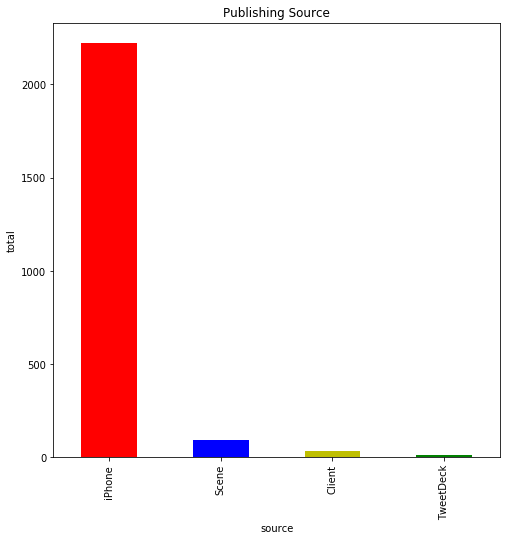

In [39]:
twitter_archive_clean.source.value_counts().plot.bar(color=('r','b','y','g'), figsize=(8,8));
plt.title('Publishing Source')
plt.xlabel('source')
plt.ylabel('total')

#### 结论
WeRateDogs最常用的发布推特的平台是iPhone

#### 2，哪种类型的狗可识别出狗的概率更大？哪种类型的狗识别不出狗的概率更大？

In [77]:
twitter_archive_clean[twitter_archive_clean.is_dog].dog_category.value_counts()

golden retriever                  173
labrador retriever                113
pembroke                           96
chihuahua                          95
pug                                65
toy poodle                         52
chow                               51
samoyed                            46
pomeranian                         42
cocker spaniel                     34
malamute                           34
french bulldog                     32
chesapeake bay retriever           31
miniature pinscher                 26
cardigan                           23
eskimo dog                         22
staffordshire bullterrier          22
beagle                             21
german shepherd                    21
shih-tzu                           20
siberian husky                     20
rottweiler                         19
lakeland terrier                   19
maltese dog                        19
kuvasz                             19
shetland sheepdog                  19
italian grey

In [49]:
twitter_archive_clean[~twitter_archive_clean.is_dog].dog_category.value_counts()

web site                       13
teddy                           6
home theater                    6
minivan                         5
porcupine                       5
doormat                         5
jigsaw puzzle                   4
patio                           4
bow tie                         4
tub                             4
hippopotamus                    4
hamster                         3
guinea pig                      3
prison                          3
common iguana                   3
triceratops                     3
sea lion                        3
llama                           3
ox                              3
balloon                         3
motor scooter                   3
christmas stocking              3
mousetrap                       3
washbasin                       3
brown bear                      2
space heater                    2
hen                             2
jellyfish                       2
hog                             2
meerkat       

#### 结论
golden retriever这种类型的狗可识别概率最高，web site可识别概率最低，看样子分类名字也有问题。

#### 3, 哪种类型的狗转发量最大？哪种类型的狗最受喜欢？

In [75]:
twitter_archive_clean.groupby('dog_category').sum().retweet_count.sort_values(ascending=False)

dog_category
golden retriever             704270
labrador retriever           465634
chihuahua                    337013
pembroke                     290602
samoyed                      247064
cocker spaniel               169965
french bulldog               167725
chow                         147152
pug                          131620
toy poodle                   118080
pomeranian                   114423
malamute                     113801
standard poodle              102368
cardigan                      99299
eskimo dog                    92669
chesapeake bay retriever      83978
lakeland terrier              81684
web site                      75384
miniature pinscher            68447
great pyrenees                67601
staffordshire bullterrier     58618
english springer              55932
german shepherd               55881
whippet                       52969
prison                        50928
basset                        49272
schipperke                    48134
shetland sheepd

In [76]:
twitter_archive_clean.groupby('dog_category').sum().favorite_count.sort_values(ascending=False)

dog_category
golden retriever                  1956730
labrador retriever                1269771
pembroke                          1036321
chihuahua                          756715
samoyed                            582082
french bulldog                     568978
chow                               456699
cocker spaniel                     413968
pug                                382463
malamute                           350710
toy poodle                         337716
pomeranian                         321704
chesapeake bay retriever           311659
cardigan                           268584
eskimo dog                         234182
german shepherd                    216664
web site                           215175
lakeland terrier                   211497
miniature pinscher                 202478
basset                             199386
staffordshire bullterrier          191141
great pyrenees                     186070
shetland sheepdog                  168674
standard poodle      

#### 结论
golden retriever这种狗是转发量最大和最受喜欢的品种